<a href="https://colab.research.google.com/github/Pratheswaran/MTH-522/blob/main/Stat_Project_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset provides information on the individuals shot and killed by the police in the united staes of america.
Dataset has two columns Age and Race.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
data = pd.read_csv('/content/Police Shootings Age Race.csv')
data

,age,race
0,8,B
1,13,B
2,14,B
3,15,B
4,15,B
...,...,...
6049,84,W
6050,88,W
6051,88,W
6052,91,W


In [20]:
blackpeople = data[data['race'] == 'B']['age']
whitepeople = data[data['race'] == 'W']['age']

The data clearly shows that there are two groups of people black and white labelled as B and W. These groups are split to know in detail about the information in the data.

In [21]:
blackstats = blackpeople.describe()
blackmedian = blackpeople.median()
blackmode = blackpeople.mode()[0]
blackskewness = skew(blackpeople)
blackkurtosis = kurtosis(blackpeople)
print("Descriptive Statistics for Black People:")
print(blackstats)
print(f"Median: {blackmedian}")
print(f"Mode: {blackmode}")
print(f"Skewness: {blackskewness}")
print(f"Kurtosis: {blackkurtosis}")

Descriptive Statistics for Black People:
count    2078.000000
mean       33.048604
std        11.445883
min         8.000000
25%        24.000000
50%        31.000000
75%        39.000000
max        88.000000
Name: age, dtype: float64
Median: 31.0
Mode: 25
Skewness: 0.9471771630506532
Kurtosis: 0.8262343866756972


There are 2078 black people.
Minimum age = 8, Maximum age = 88
Skewness : 0.947 which says that the distribution is positievly skewed.
Kurtosis : 0.826 this shows that the distribution is slightly peak from the normal distribution. The data shows a minor deflections from a normal distribution with a higher concentration in the centre which is shown in the below graph.

<Axes: xlabel='age', ylabel='Density'>

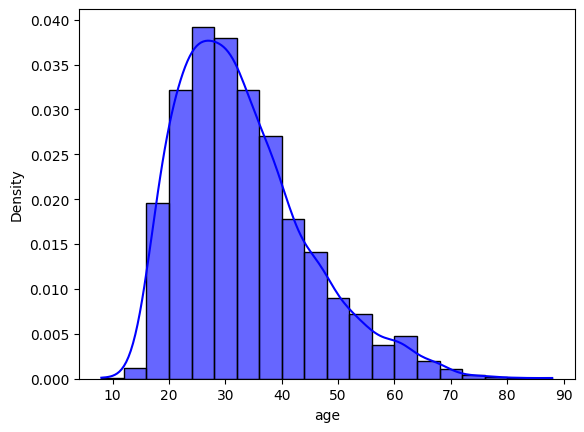

In [22]:
sns.histplot(blackpeople, kde=True, color='blue', label='Black', stat='density', bins=20, alpha=0.6)

The above graph shows the distribution of the black people.
The X axis represents the age and the y axis represents the frequency.The histgram shows the frequency distribution of age with the manjority of the data. This clearly shows that the majority of the people are between 20 -40 years.The high count of people are in thier 30's. As mentioned above the density curve helps to visualise the skewness which is rightly skewed which defines that there are more younger people.

In [23]:
whitestats = whitepeople.describe()
whitemedian = whitepeople.median()
whitemode = whitepeople.mode()[0]
whiteskewness = skew(whitepeople)
whitekurtosis = kurtosis(whitepeople)

print("Descriptive Statistics for White People:")
print(whitestats)
print(f"Median: {whitemedian}")
print(f"Mode: {whitemode}")
print(f"Skewness: {whiteskewness}")
print(f"Kurtosis: {whitekurtosis}")

Descriptive Statistics for White People:
count    3976.000000
mean       40.270875
std        13.091754
min         2.000000
25%        30.000000
50%        38.000000
75%        49.000000
max        91.000000
Name: age, dtype: float64
Median: 38.0
Mode: 34
Skewness: 0.5420546838752048
Kurtosis: -0.05525599125498548


There are 3976 white people. Minimum age = 2, Maximum age = 91 Skewness : 0.542 which says that the distribution is positievly skewed. Kurtosis : -0.055 the negative kurtosis terms that the data is more spread and less concentrated. The data shows a minor deflections from a normal distribution which is shown in the below graph.

<Axes: xlabel='age', ylabel='Density'>

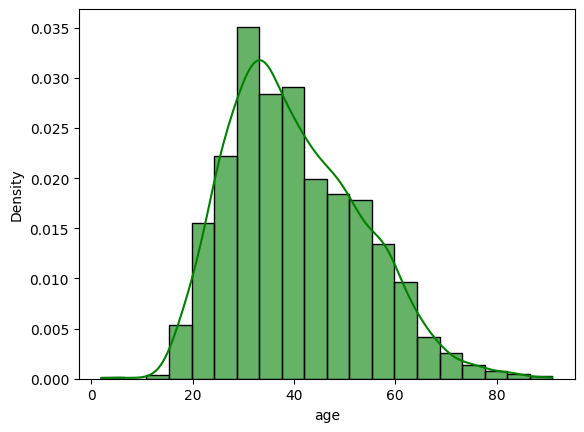

In [24]:
sns.histplot(whitepeople, kde=True, color='green', label='White', stat='density', bins=20, alpha=0.6)

The above graph shows the distribution of the white people. The X axis represents the age and the y axis represents the frequency. There is a diffeneces in the distribution between the black and white people. The distribution show that the people around 30-40's are high. The density curve shows a higher concentration of individuals in 30-40 with a few older people around 60.

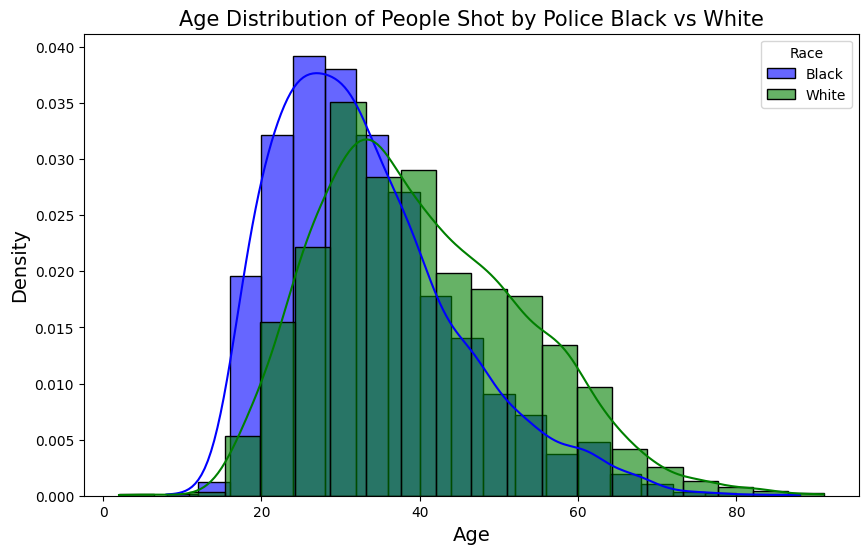

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(blackpeople, kde=True, color='blue', label='Black', stat='density', bins=20, alpha=0.6)
sns.histplot(whitepeople, kde=True, color='green', label='White', stat='density', bins=20, alpha=0.6)
plt.title('Age Distribution of People Shot by Police Black vs White', fontsize=15)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Race')
plt.show()

This graph concludes that the people shot by police differes. Among black more often shot are 20's and the white being older around 30-40's.

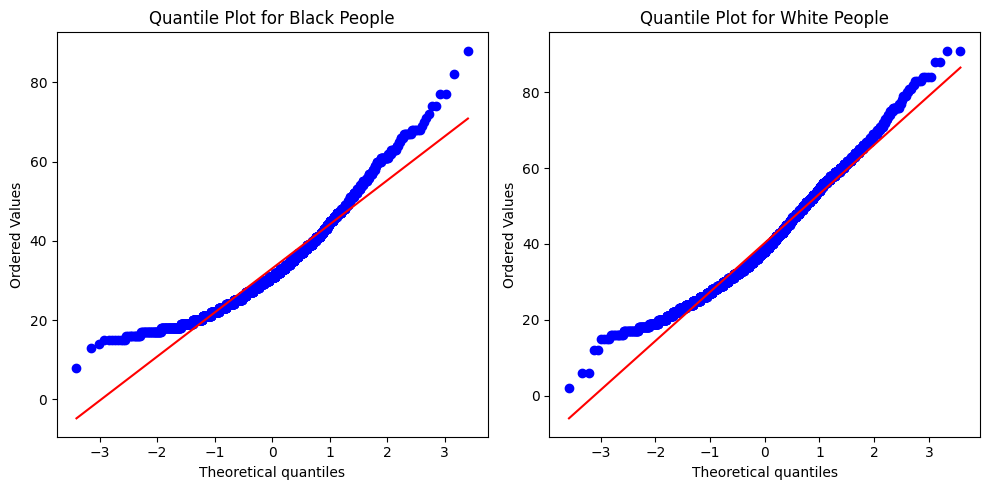

In [29]:
from scipy import stats
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
stats.probplot(blackpeople, dist="norm", plot=plt)
plt.title("Quantile Plot for Black People")
plt.subplot(1, 2, 2)
stats.probplot(whitepeople, dist="norm", plot=plt)
plt.title("Quantile Plot for White People")
plt.tight_layout()
plt.show()

The Q-Q plot shows that the black people have some deviations in the distribution as there are deviations in the higher and lower ends.
For the White Peopleteh quantiles are closely along the line which means that the data is likely normal than the black people.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

In [30]:
x_black, y_black = ecdf(blackpeople)
x_white, y_white = ecdf(whitepeople)

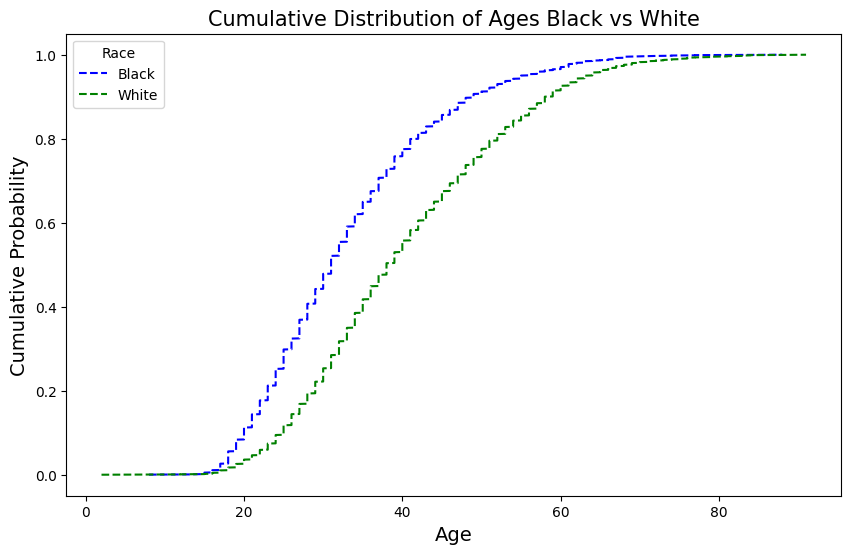

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(x_black, y_black, marker='none', linestyle='--', color='blue', label='Black')
plt.plot(x_white, y_white, marker='none', linestyle='--', color='green', label='White')
plt.title('Cumulative Distribution of Ages Black vs White', fontsize=15)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.legend(title='Race')
plt.show()

This graph provided gives the CDF plot comparing the distribution of ages of bothe black and white people shot by police.
The blue represents the black people which is shifted left to the green curve indicating that the black people shot were younger.
The green curve indicates that the white people shot by the police tend to be older on average.
The cumulative probablity for black people is higher than the white people which means a higher number of people are shot by police at younger ages compared to white people.
In the graph for any age lets say around age 30 the cumulative probablity is 0.5 -0.6 which means that 50-60% of the balck people are shot by police are aged 30 or younger.Whereas for white people it is lower.
Both curves flatten out near the top, with cumulative probabilities reaching 1 around similar maximum ages 80 -85. This shows that at the upper end of the age spectrum, both black and white people shot by police reach similar maximum ages, but black people generally have higher proportions of younger individuals.
The CDF plot shows a significant age disparity between black and white people shot by police. Black individuals are disproportionately younger compared to white individuals based on the data.

In [36]:
mean_black = np.mean(blackpeople)
mean_white = np.mean(whitepeople)
std_black = np.std(blackpeople, ddof=1)
std_white = np.std(whitepeople, ddof=1)

In [37]:
pooled_std = np.sqrt(((len(blackpeople) - 1) * std_black**2 + (len(whitepeople) - 1) * std_white**2) / (len(blackpeople) + len(whitepeople) - 2))
cohen_d = (mean_black - mean_white) / pooled_std

In [16]:
print(f"Cohen's d: {cohen_d}")

Cohen's d: -0.575422332150653


The Cohen's d value of -0.575 suggests a medium effect size. This means that the average age difference between black and white people shot by police is moderate, but not very large.The negative sign indicates that, on average, black people shot by police tend to be younger than white people, which aligns with what we saw in the cumulative distribution function CDF plot. Specifically, the mean age of black people shot by police is moderately lower compared to white people.

In [38]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(blackpeople, whitepeople)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -21.257464575572655, P-value: 9.020231053936359e-97


**Null Hypothesis :** There is no significant difference between the age groups.

**Alternate hypothesis :** There is a significant difference between the two groups.

The t-statistic of -21.26 is a very large negative value, indicating a strong difference between the two groups' mean ages. A large absolute t-value indicates that the observed difference in means is far from what would be expected if there were no difference.
The p-value is extremely small.his indicates that the observed difference in the mean ages between black and white people shot by police is highly statistically significant. A p-value this small means there is almost no probability that this difference is due to random chance. As the p value is less than the significance level the null hypohesis is rejected.

This means that there are differences in the groups.


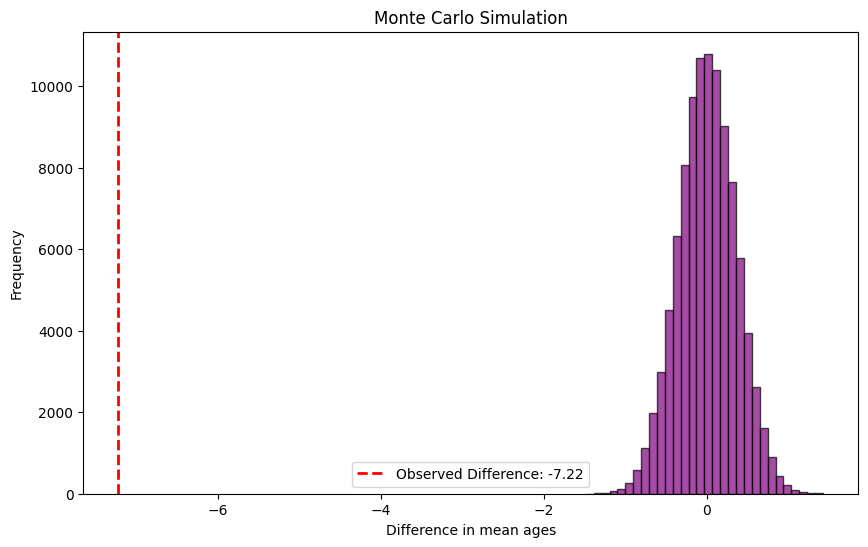

Monte Carlo P-value: 0.0


In [40]:
n_iterations = 100000
observed_diff = mean_black - mean_white
combined = np.concatenate([blackpeople, whitepeople])
random_diffs = []
for _ in range(n_iterations):
    np.random.shuffle(combined)
    new_black = combined[:len(blackpeople)]
    new_white = combined[len(blackpeople):]
    random_diff = np.mean(new_black) - np.mean(new_white)
    random_diffs.append(random_diff)
random_diffs = np.array(random_diffs)
p_value_monte_carlo = np.sum(np.abs(random_diffs) >= np.abs(observed_diff)) / n_iterations
plt.figure(figsize=(10, 6))
plt.hist(random_diffs, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Difference: {observed_diff:.2f}')
plt.title('Monte Carlo Simulation')
plt.xlabel('Difference in mean ages')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f"Monte Carlo P-value: {p_value_monte_carlo}")